In [85]:
import requests
import pandas as pd
from datetime import datetime
from dataretrieval import nwis
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
pip install -U dataretrieval

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install -U dataretrieval

# NATIONAL WATER INFORMATION SYSTEM

# dataretrieval is a Python alternative to USGS-R's dataRetrieval package for obtaining USGS or EPA water quality data,
# streamflow data, and metadata directly from web services. Note that dataretrieval is an alternative to the R package,
# not a port, in that it reproduces the functionality of the R package but its organization and functionality often differ. 
# The Python version also expands upon its predecessor by including capability to pull data from a variety of web portals
# besides NWIS and STORET.


# services (use as service as argument for nwis.get_record())

# instantaneous values ('iv') 
# daily values ('dv')
# statistics ('stat')
# site info ('site')
# discharge peaks ('peaks')
# discharge measurements ('measurements')

In [87]:
curr_datetime = datetime.now()

curr_year = curr_datetime.year
curr_month = curr_datetime.month
curr_day = curr_datetime.day

curr_hour = curr_datetime.hour
curr_min = curr_datetime.minute
curr_sec = curr_datetime.second

curr_min

7

In [111]:
gallatin  = {'logan': {'site_id':'06052500', 'lat':'45.88535556' , 'long':'-111.438286', 'alt':'4086.42'},
             'gateway': {'site_id':'06043500', 'lat':'45.4973' , 'long':'-111.2707083' , 'alt':'5167.67'},
             'big_sky' : {'site_id':'06043120', 'lat':'45.29727778', 'long':'-111.2113917' , 'alt':'5875'},
             'n_bozeman': {'site_id':'06048650', 'lat':'45.72566667', 'long':'-111.0661944' , 'alt':'4625'}             
            }
tenmile = {'remini' : {'site_id':'06062500', 'lat':'46.5238972', 'long':'-112.2566472', 'alt':'4850'},
           'helena' : {'site_id':'06063000', 'lat':'46.60500556', 'long':'-112.0882639', 'alt':'3953.21'}
          }
boulder = { 'boulder': {'site_id':'06033000', 'lat':'46.21103056', 'long':'-112.09165', 'alt':'4810'},
          }
hyalite = { 'bozeman' : {'site_id':'06050000', 'lat':'45.56332778' , 'long':'-111.0718889', 'alt':'5539.6'}
          }
gardner = { 'mammoth': {'site_id':'06191000', 'lat':'44.9923444' , 'long':'-110.690975' , 'alt':'5623.97'}
          }
lamar = {'ynp_tower' : {'site_id':'06188000', 'lat':'44.92817778' , 'long':'-110.3942694' , 'alt':'6000'}
        }
thompson = {'thompson_falls' : {'site_id':'12389500', 'lat':'47.5918583' , 'long':'-115.229536' , 'alt':'2429.97'}
        }
rock_creek = {clinton : {'site_id':'12334510', 'lat':'46.7223361' , 'long':'-113.683061' , 'alt':'3519.46'}
              }
clark_fork = {garrison: {'site_id':'12324400', 'lat':'46.5109111' , 'long':'-112.789686' , 'alt':'4350'}
             }

rivers = [rock_creek, clark_fork]


{'site_id':'', 'lat':'' , 'long':'' , 'alt':''  }

                   

a = pd.DataFrame(tenmile)
a = a.transpose()
a

NameError: name 'clinton' is not defined

In [89]:
a.iloc[0][0]

'06062500'

In [94]:
pd.DataFrame.from_dict(gallatin)

,logan,gateway,big_sky,n_bozeman
site_id,06052500,06043500,06043120,06048650
lat,45.88535556,45.4973,45.29727778,45.72566667
long,-111.438286,-111.2707083,-111.2113917,-111.0661944
alt,4086.42,5167.67,5875,4625


In [101]:
b = pd.DataFrame(gallatin.items())
b

,0,1
0,logan,"{'site_id': '06052500', 'lat': '45.88535556', ..."
1,gateway,"{'site_id': '06043500', 'lat': '45.4973', 'lon..."
2,big_sky,"{'site_id': '06043120', 'lat': '45.29727778', ..."
3,n_bozeman,"{'site_id': '06048650', 'lat': '45.72566667', ..."


In [104]:
gallatin.keys()

dict_keys(['logan', 'gateway', 'big_sky', 'n_bozeman'])

In [78]:
df = pd.DataFrame(gallatin)
df = df.transpose()
site_id = df['site_id']
site_id


logan        06052500
gateway      06043500
big_sky      06043120
n_bozeman    06048650
Name: site_id, dtype: object

In [117]:
df = nwis.get_record(sites=pricklypear_clancy, service='site', start=start, end=end)
df

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,06061500,Prickly Pear Creek near Clancy MT,ST,463108.75,1115648.43,46.519097,-111.946786,N,1,...,Y,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
df = nwis.get_record(sites=pricklypear_clancy, service='dv', start=start, end=end)
df = df.rename(columns = {'00060':'Discharge (CFS)', '00065':'Depth (ft)'})
#df = df.drop(columns = ['00060_cd', 'site_no', '00065_cd']).reset_index()
df

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
2022-10-29 00:00:00+00:00,24.2,P,06061500
2022-10-30 00:00:00+00:00,24.7,P,06061500
2022-10-31 00:00:00+00:00,25.2,P,06061500
2022-11-01 00:00:00+00:00,29.6,P,06061500


In [28]:
df['day'] = df['datetime'].map(lambda x: x.day)
df['month'] = df['datetime'].map(lambda x: x.month)
df['year'] = df['datetime'].map(lambda x: x.year)
df['hour'] = df['datetime'].map(lambda x: x.hour)
df['minute'] = df['datetime'].map(lambda x: x.minute)
#df['second'] = df['datetime'].map(lambda x: x.second)

In [29]:
df

,datetime,Discharge (CFS),Depth (ft),day,month,year,hour,minute
0,2022-10-29 00:00:00-06:00,23.7,0.63,29,10,2022,0,0
1,2022-10-29 00:15:00-06:00,23.7,0.63,29,10,2022,0,15
2,2022-10-29 00:30:00-06:00,24.2,0.64,29,10,2022,0,30
3,2022-10-29 00:45:00-06:00,24.2,0.64,29,10,2022,0,45
4,2022-10-29 01:00:00-06:00,24.2,0.64,29,10,2022,1,0
...,...,...,...,...,...,...,...,...
362,2022-11-01 18:30:00-06:00,30.2,0.75,1,11,2022,18,30
363,2022-11-01 18:45:00-06:00,30.2,0.75,1,11,2022,18,45
364,2022-11-01 19:00:00-06:00,30.2,0.75,1,11,2022,19,0
365,2022-11-01 19:15:00-06:00,30.2,0.75,1,11,2022,19,15


/home/chase/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='datetime', ylabel='Discharge (CFS)'>

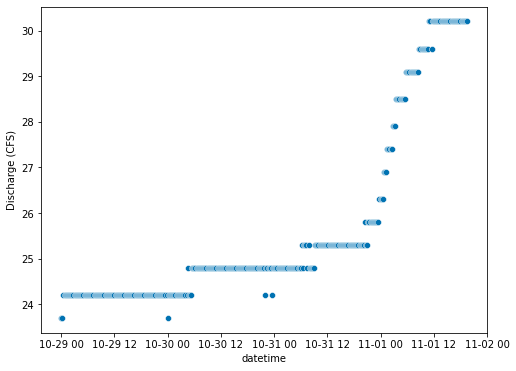

In [30]:
plt.style.use('seaborn-colorblind')

plt.figure(figsize=(8,6))
sns.scatterplot(df['datetime'], df['Discharge (CFS)'])